In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor




# Data Understanding


In [87]:
bike_dataSet = pd.read_csv("./data/day.csv")
bike_dataSet.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [88]:
#Data Description
bike_dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [89]:
bike_dataSet.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [90]:
bike_dataSet.shape

(730, 16)

***Data Analysis:***
- Total Records are 730 x 16
- All the columns except dteday i.e. date object type are either integer or float
- There are fields that are categorical in nature, but their values are integer/float

# Data Check

In [91]:
# Checking for missing values

round(100*(bike_dataSet.isnull().sum()/len(bike_dataSet)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [92]:
bike_dataSet_dup = bike_dataSet.copy()
bike_dataSet_dup.drop_duplicates(subset=None, inplace=True)
bike_dataSet_dup.shape

(730, 16)

In [93]:
bike_dataSet.shape

(730, 16)

***Data Analysis:***
- There is no missing value in the data set
- There is no duplicate values as the shape is equal for both duplicate data set and actual data set

# Data Cleaning

In [94]:
bike_dataSet.drop(columns=['instant','dteday','casual','registered'],axis=1,inplace=True)
bike_dataSet.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


***Data Analysis and Actions:***
- "instant" column is the serial no, so we can remove this
- "dteday" column is the dat type column whichis not required as we have year, month columns present
- as our target is to achieve the total number of bikes used, we can remove the "casual" and "registered" columns


In [95]:
bike_dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [96]:
#Changing season int value to string
bike_dataSet['season']=bike_dataSet['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
# bike_dataSet['weekday']=bike_dataSet['weekday'].map({0:'sunday',1:'monday', 2:'teusday', 3:'wednesday', 4:'thursday',5:'friday',6:'saturday'})
# bike_dataSet['mnth']=bike_dataSet['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [97]:
bike_dataSet.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [98]:
bike_dataSet.shape

(730, 12)

# Creating Dummy Variables

There are 4 fields for whih we need to create dummy variables as they are the categorical variables
- "mnth"
- "weekday"
- "season"
- "weathersit"

In [99]:
bike_dataSet.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [100]:
# Converting the categorical columns beofre creating the dummy variables
bike_dataSet['season']=bike_dataSet['season'].astype('category')
bike_dataSet['weathersit']=bike_dataSet['weathersit'].astype('category')
bike_dataSet['mnth']=bike_dataSet['mnth'].astype('category')
bike_dataSet['weekday']=bike_dataSet['weekday'].astype('category')
bike_dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [101]:
# Creating dummy variables and droping first column
# This function will create dummy variable and drop the respective columns and drop first columns
bike_clean_dataSet = pd.get_dummies(bike_dataSet,drop_first=True)
bike_clean_dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   atemp          730 non-null    float64
 5   hum            730 non-null    float64
 6   windspeed      730 non-null    float64
 7   cnt            730 non-null    int64  
 8   season_spring  730 non-null    bool   
 9   season_summer  730 non-null    bool   
 10  season_winter  730 non-null    bool   
 11  mnth_2         730 non-null    bool   
 12  mnth_3         730 non-null    bool   
 13  mnth_4         730 non-null    bool   
 14  mnth_5         730 non-null    bool   
 15  mnth_6         730 non-null    bool   
 16  mnth_7         730 non-null    bool   
 17  mnth_8         730 non-null    bool   
 18  mnth_9    

# Data Visualization With Pair Plot

c:\Users\Ranjit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


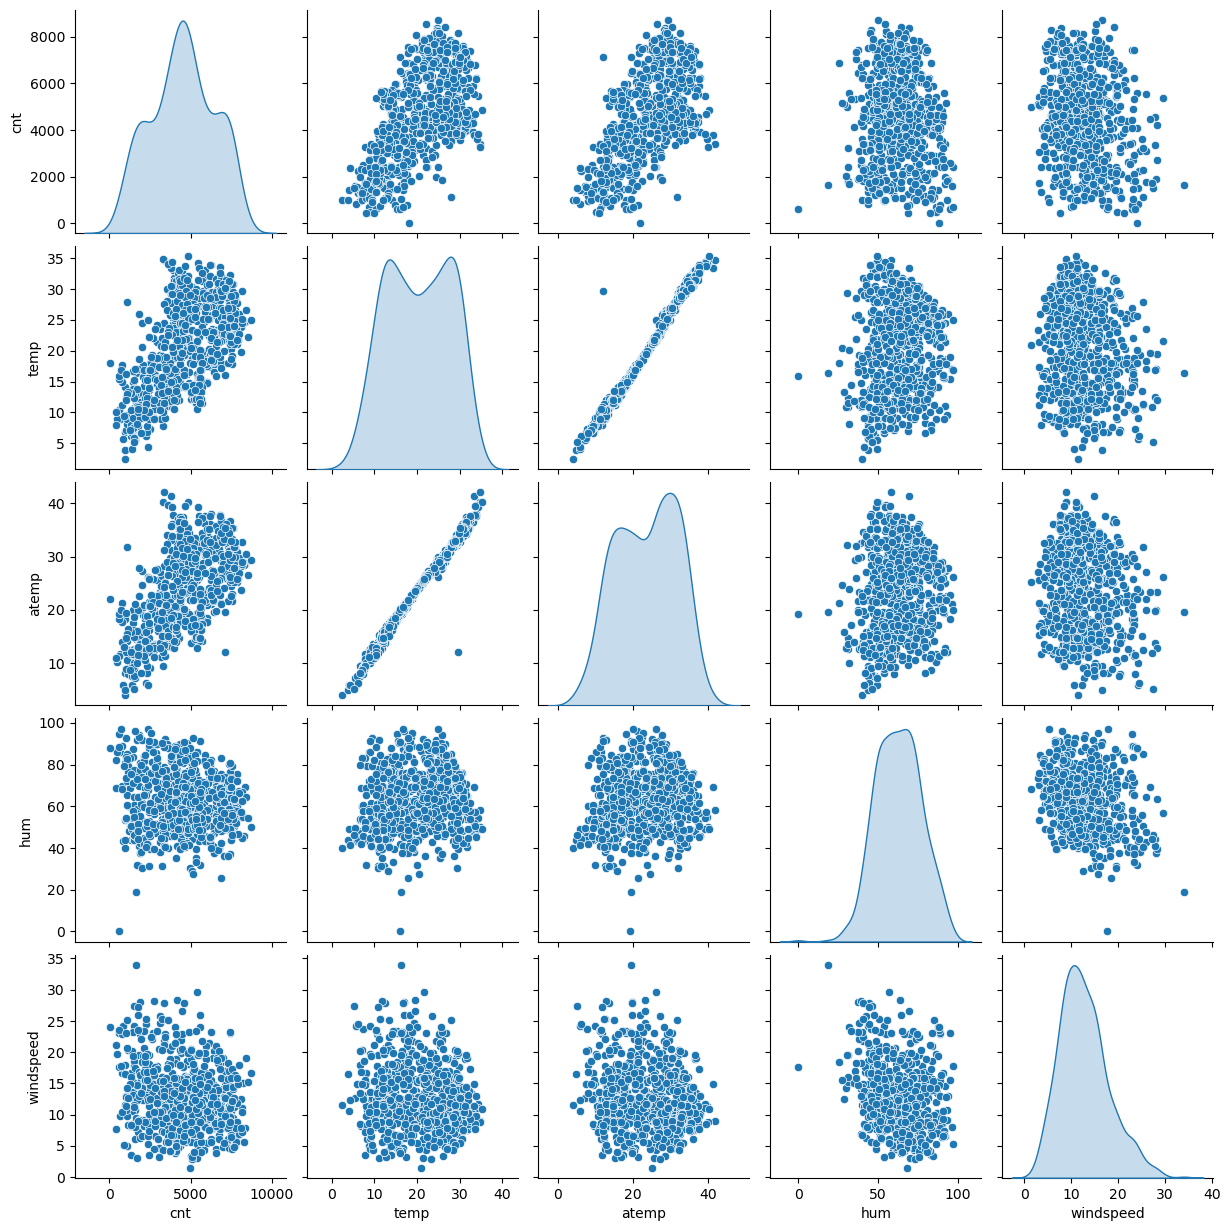

In [102]:
#Data visualizing for non categorical data
bike_num=bike_clean_dataSet[[ 'cnt','temp', 'atemp', 'hum', 'windspeed']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

Analysis
- There is a linear relation inbetween cnt, atemp and temp

# Data Visualization With Box Plot

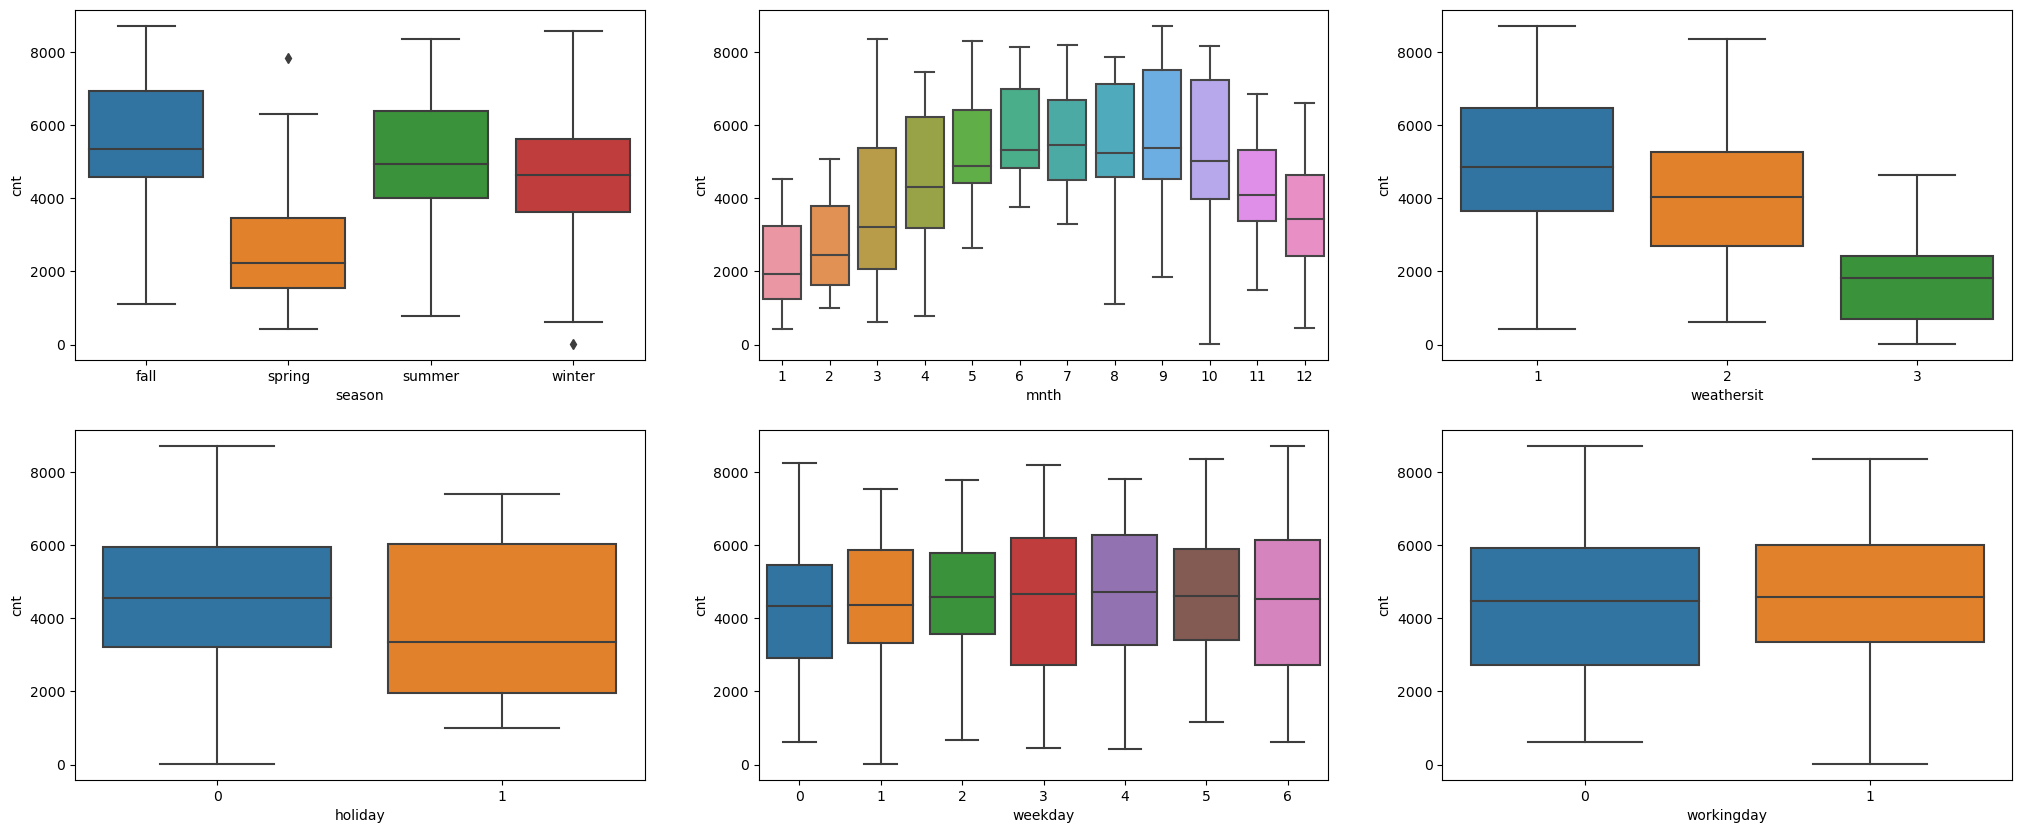

In [103]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_dataSet)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_dataSet)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_dataSet)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_dataSet)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_dataSet)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_dataSet)
plt.show()

Analysis of Categorical data

- season can be a good predictor for our model as the season 3 has the median almost at par 5000, and season 2 and 4 also behind that with median of 4000+
- mnth also can be a good predictor as it also shows that the bike booking go up in the month of 9th followed by 6th, 8th and 10th.
- weathersit is a good predictor too as it clearly shows that the weathersit1 has the median of 5000+
- Rest of them we will se how the model predicts as there is not much diference in their median

# Splliting Data Set

## Splitting the Data into Training and Testing Sets

In [104]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train_set, bike_test_set = train_test_split(bike_clean_dataSet, train_size = 0.7, test_size = 0.3, random_state = 100)

In [105]:
print(bike_train_set.shape)
print(bike_test_set.shape)

(510, 30)
(219, 30)


## Rescaling the Features
- we need to rescale some data so that they have a comparabel scale

In [106]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except 'dummy' variables and 1/0 variable
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
# Scaling the Train Set
bike_train_set[num_vars] = scaler.fit_transform(bike_train_set[num_vars])
bike_train_set.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,False,False,...,False,False,False,True,False,False,False,False,False,False
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,True,False,...,False,False,False,False,False,False,False,True,True,False
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,True,False,...,False,True,False,False,False,False,False,False,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,True,...,False,False,False,False,False,False,False,True,True,False


In [107]:
bike_train_set.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now the data is bieng rescaled, every data have the max as 1 and min as 0. this will help tp get better correleation among the data

## Putting up a correlation matrix
- Visualizing correlation coefficients to see what variables are highly correlated

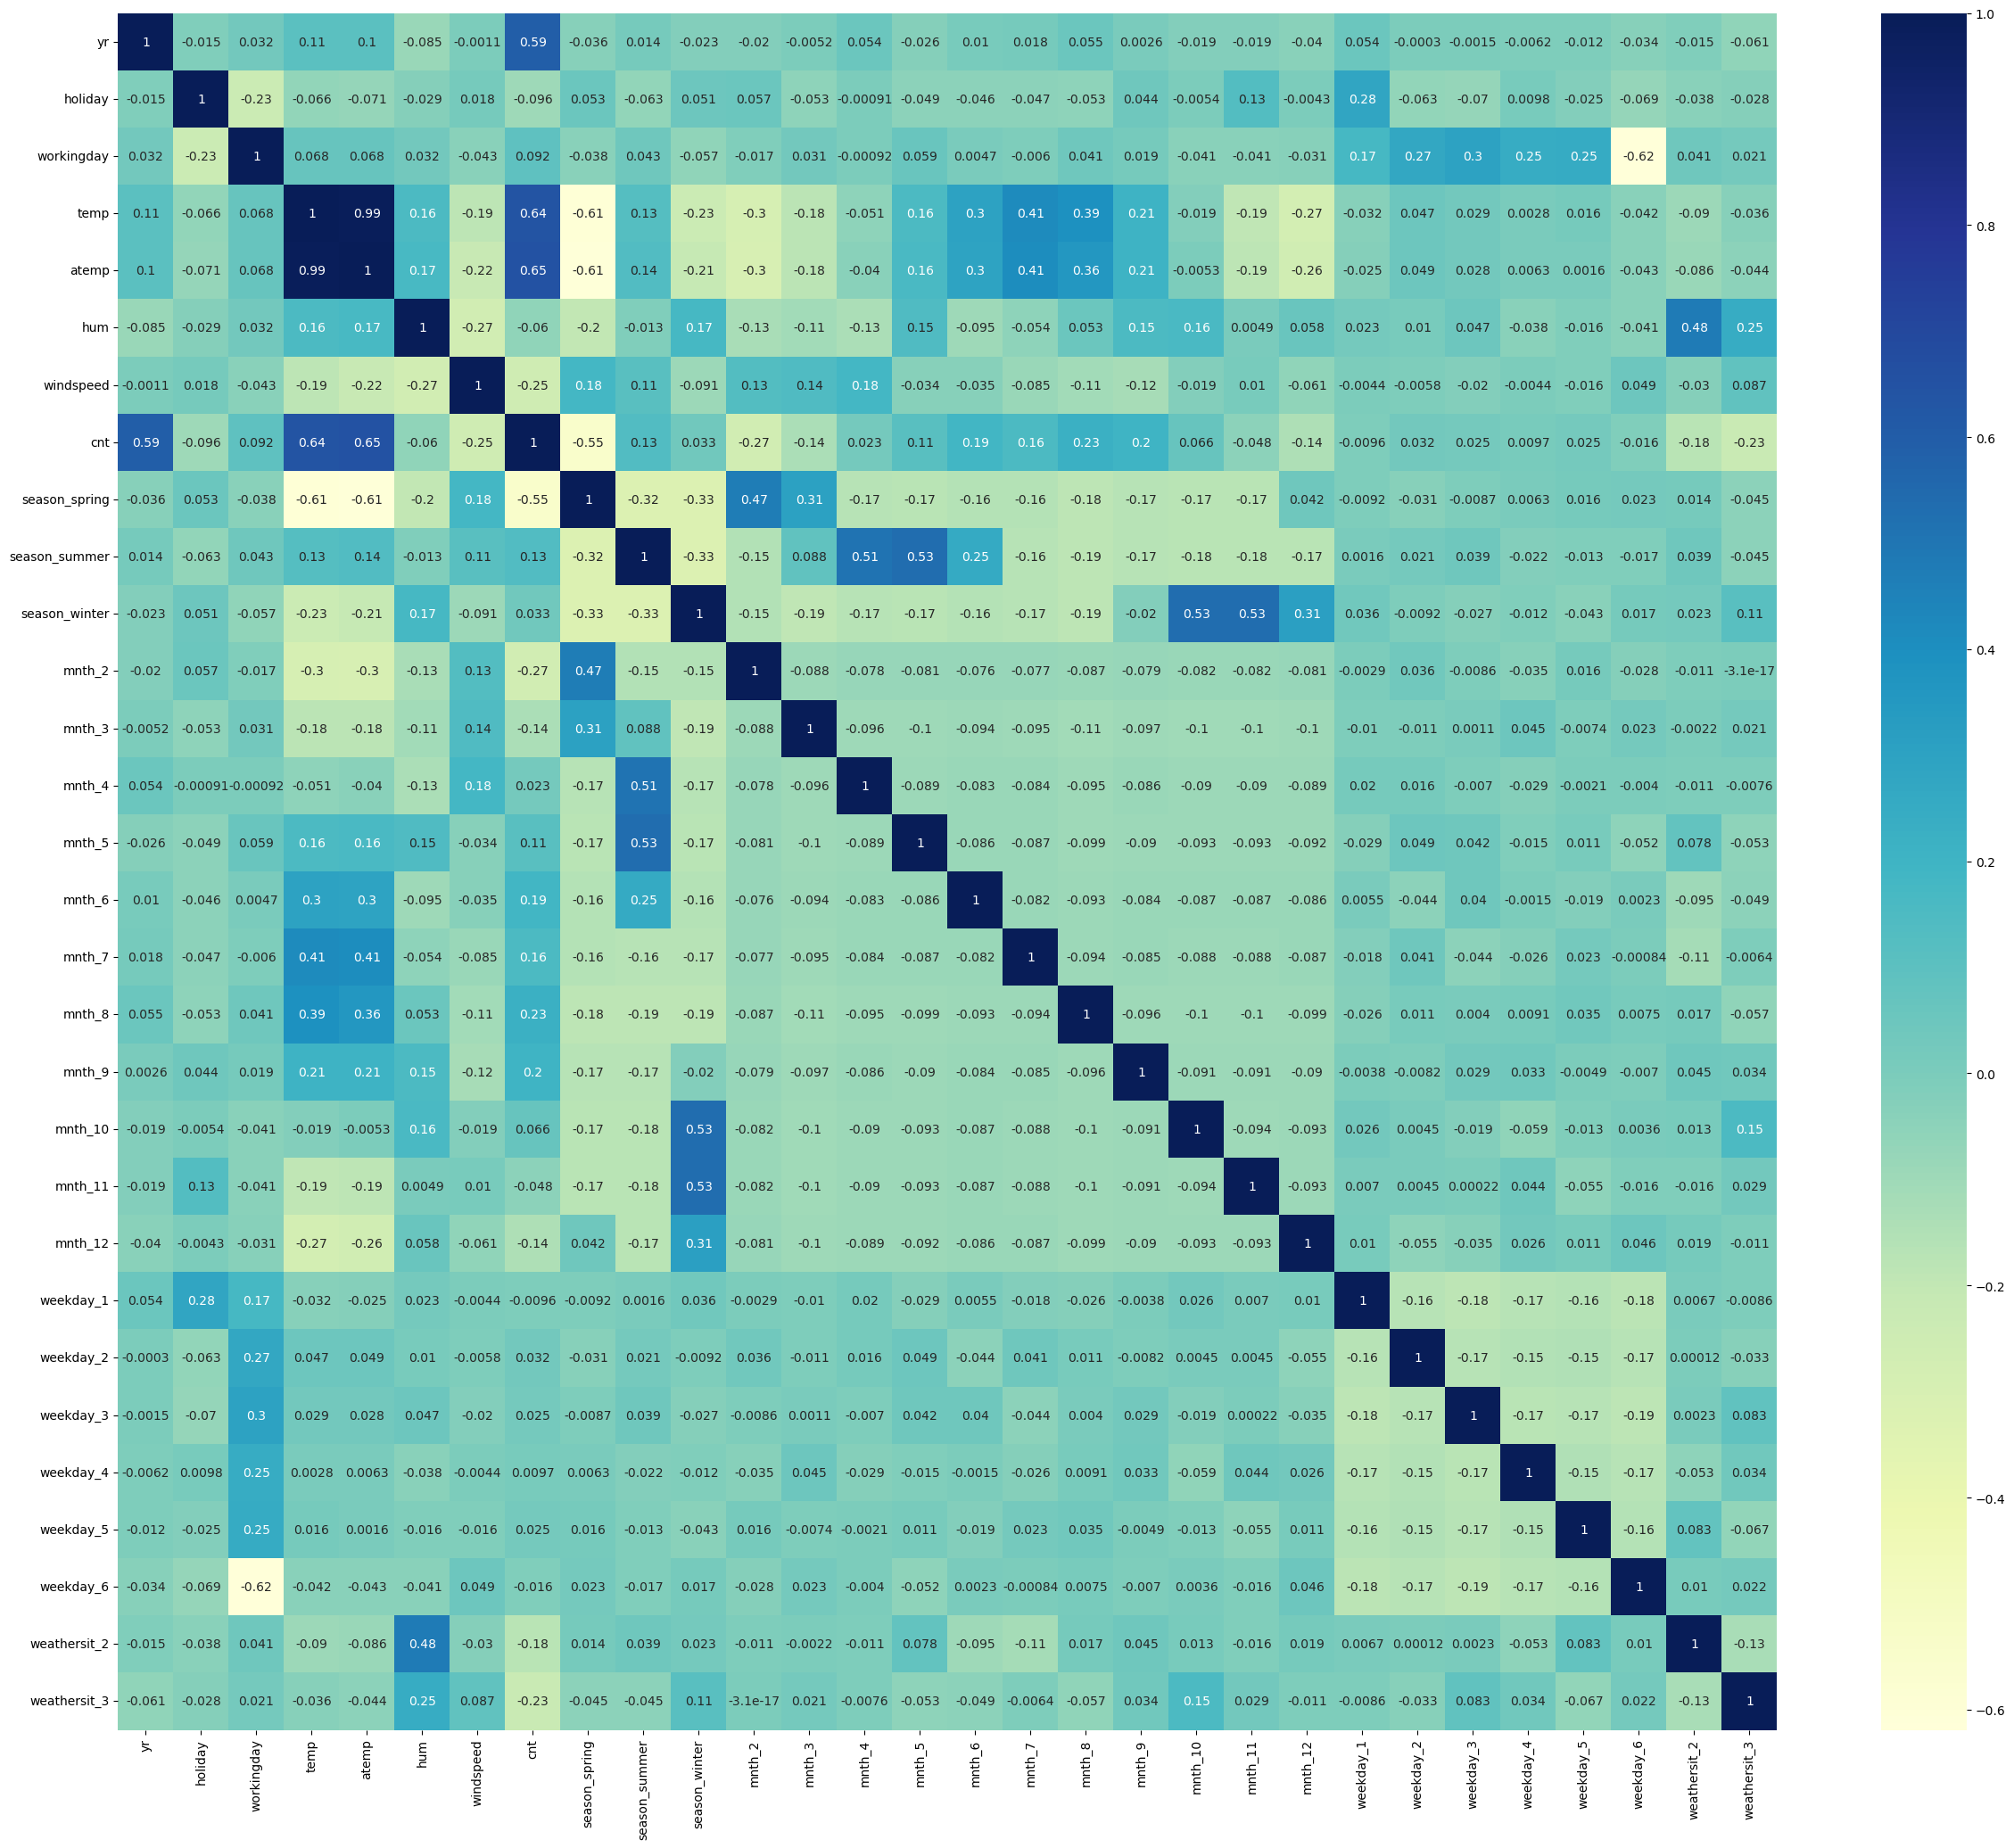

In [108]:
plt.figure(figsize = (30, 25))
sns.heatmap(bike_train_set.corr(), annot = True, cmap="YlGnBu")
plt.show()

We see temp and atemp are highly corelated with cnt, lets see a scatter plot to visualize the trend

## Putting up a Scatter Plot
- Visualizing Linearity in tem and atemp variable w.r.t cnt

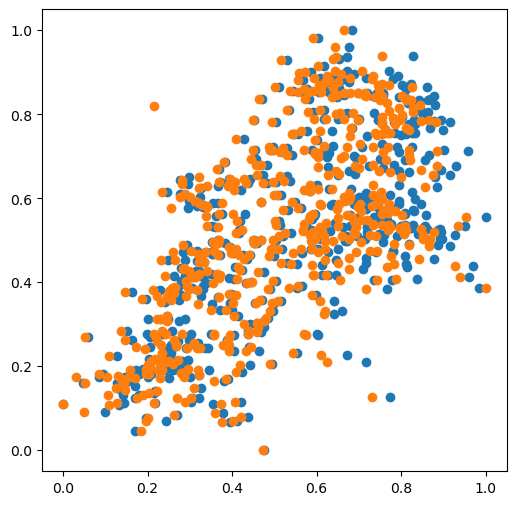

In [109]:
plt.figure(figsize=[6,6])
plt.scatter(bike_train_set.temp, bike_train_set.cnt)
plt.scatter(bike_train_set.atemp, bike_train_set.cnt)
plt.show()

We clearly see atemp and temp has a clear linear line rising up with the cnt

# Feature Selection & Model Building

## Mixed Approach - Automated RFE + Manual removing feature using VIF and P-Values

**Training Set**

In [110]:
# Dividing training set into X and Y sets for the model building
y_bike_train_cnt = bike_train_set.pop('cnt')
X_bike_train_set = bike_train_set

### Iteration 1

#### Feature Selection
- We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [111]:
# Initializing the lr Object
lr = LinearRegression()
lr.fit(X_bike_train_set, y_bike_train_cnt)

# Taking 10 columns initially as feature to be selected
rfe = RFE(estimator=lr,n_features_to_select=15)
rfe = rfe.fit(X_bike_train_set, y_bike_train_cnt)
list(zip(X_bike_train_set.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 2),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', False, 3),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [112]:
# RFE supported column
rfe_sup_col = X_bike_train_set.columns[rfe.support_]
rfe_sup_col


Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8',
       'mnth_9', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [113]:
#  RFE non supporting columns
X_bike_train_set.columns[~rfe.support_]

Index(['workingday', 'atemp', 'season_summer', 'mnth_2', 'mnth_7', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [114]:
# Create data frame only selecting the RFE supported variables
X_bike_train_set_rfe = X_bike_train_set[rfe_sup_col]
X_bike_train_set_rfe.head()

,yr,holiday,temp,hum,windspeed,season_spring,season_winter,mnth_3,mnth_4,mnth_5,mnth_6,mnth_8,mnth_9,weathersit_2,weathersit_3
653,1,0,0.509887,0.575354,0.300794,False,True,False,False,False,False,False,False,False,False
576,1,0,0.815169,0.725633,0.264686,False,False,False,False,False,False,False,False,False,False
426,1,0,0.442393,0.640189,0.255342,True,False,True,False,False,False,False,False,True,False
728,1,0,0.245101,0.498067,0.663106,True,False,False,False,False,False,False,False,False,False
482,1,0,0.395666,0.504508,0.188475,False,False,False,True,False,False,False,False,True,False


#### Model Building
- Building model using statsmodel, for the detailed statistics

In [115]:
# Adding the constant variable
X_bike_train_lrm = sm.add_constant(X_bike_train_set_rfe)
X_bike_train_lrm.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_winter,mnth_3,mnth_4,mnth_5,mnth_6,mnth_8,mnth_9,weathersit_2,weathersit_3
653,1.0,1,0,0.509887,0.575354,0.300794,False,True,False,False,False,False,False,False,False,False
576,1.0,1,0,0.815169,0.725633,0.264686,False,False,False,False,False,False,False,False,False,False
426,1.0,1,0,0.442393,0.640189,0.255342,True,False,True,False,False,False,False,False,True,False
728,1.0,1,0,0.245101,0.498067,0.663106,True,False,False,False,False,False,False,False,False,False
482,1.0,1,0,0.395666,0.504508,0.188475,False,False,False,True,False,False,False,False,True,False


In [116]:
# Running the LR Model
lrm = sm.OLS(y_bike_train_cnt,X_bike_train_lrm.astype(float)).fit()

#### Model Summary

In [117]:
#Let's see the summary of our LR Model
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.3
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          9.99e-188
Time:                        19:39:15   Log-Likelihood:                 511.20
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     494   BIC:                            -922.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2867      0.034      8.537

In [118]:
print(f'{"R-Squared: "}{round(lrm.rsquared * 100,1)}{"%"}')
print(f'{"Adj.R-Squared: "}{round(lrm.rsquared_adj * 100,1)}{"%"}')

R-Squared: 84.3%
Adj.R-Squared: 83.9%


#### Model VIF

In [119]:
# Remove added const variable before VIF Calculation
X_bike_train_vif = X_bike_train_lrm.drop(['const'], axis=1)
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_bike_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_bike_train_vif.astype(float).values, i) for i in range(X_bike_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.74
2,temp,16.09
4,windspeed,4.69
5,season_spring,3.62
6,season_winter,3.29
13,weathersit_2,2.26
0,yr,2.09
11,mnth_8,1.93
9,mnth_5,1.77
8,mnth_4,1.69


Analysis:
- According to the VIF table and above summary, 'hum',''temp' and 'workingday' has VIF value > 5 i.e. high multicollinearity with 'p value' at '0.0' which is under 0.05.
- We need to remove the high VIF features.


### Iteration 2

#### Removing High VIF Features

In [120]:
X_bike_train_set_rfe=X_bike_train_set_rfe.drop(['hum'],axis=1)
X_bike_train_set_rfe.head()

,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_3,mnth_4,mnth_5,mnth_6,mnth_8,mnth_9,weathersit_2,weathersit_3
653,1,0,0.509887,0.300794,False,True,False,False,False,False,False,False,False,False
576,1,0,0.815169,0.264686,False,False,False,False,False,False,False,False,False,False
426,1,0,0.442393,0.255342,True,False,True,False,False,False,False,False,True,False
728,1,0,0.245101,0.663106,True,False,False,False,False,False,False,False,False,False
482,1,0,0.395666,0.188475,False,False,False,True,False,False,False,False,True,False


#### Model Re-Build

In [121]:
# Adding constant again
X_bike_train_lrm = sm.add_constant(X_bike_train_set_rfe)
X_bike_train_lrm.head()

,const,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_3,mnth_4,mnth_5,mnth_6,mnth_8,mnth_9,weathersit_2,weathersit_3
653,1.0,1,0,0.509887,0.300794,False,True,False,False,False,False,False,False,False,False
576,1.0,1,0,0.815169,0.264686,False,False,False,False,False,False,False,False,False,False
426,1.0,1,0,0.442393,0.255342,True,False,True,False,False,False,False,False,True,False
728,1.0,1,0,0.245101,0.663106,True,False,False,False,False,False,False,False,False,False
482,1.0,1,0,0.395666,0.188475,False,False,False,True,False,False,False,False,True,False


In [122]:
# Running the LR Model again with new set of features
lrm = sm.OLS(y_bike_train_cnt,X_bike_train_lrm.astype(float)).fit()

#### Model Summary

In [123]:
#Let's see the summary of our latest LR Model
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          3.23e-185
Time:                        19:39:16   Log-Likelihood:                 502.48
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     495   BIC:                            -911.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2030      0.027      7.445

In [124]:
print(f'{"R-Squared: "}{round(lrm.rsquared * 100,1)}{"%"}')
print(f'{"Adj.R-Squared: "}{round(lrm.rsquared_adj * 100,1)}{"%"}')

R-Squared: 83.8%
Adj.R-Squared: 83.3%


#### Model VIF

In [125]:
# Remove added const variable before VIF Calculation
X_bike_train_vif = X_bike_train_lrm.drop(['const'], axis=1)
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_bike_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_bike_train_vif.astype(float).values, i) for i in range(X_bike_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.49
3,windspeed,4.68
4,season_spring,2.10
0,yr,2.08
5,season_winter,1.94
10,mnth_8,1.91
9,mnth_6,1.65
8,mnth_5,1.59
12,weathersit_2,1.55
7,mnth_4,1.53


Analysis:
- According to the VIF table and above summary, 'temp' and 'workingday' has VIF value > 5 i.e. high multicollinearity with 'p value' at '0.0' which is under 0.05.
- But 'temp' has high significance with ' target variable 'cnt;.
- So, We need to remove the high P-Value features.

### Iteration 3

#### Removing High P-Value Features

In [126]:
X_bike_train_set_rfe=X_bike_train_set_rfe.drop(['mnth_8'],axis=1)
X_bike_train_set_rfe.head()

,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_3,mnth_4,mnth_5,mnth_6,mnth_9,weathersit_2,weathersit_3
653,1,0,0.509887,0.300794,False,True,False,False,False,False,False,False,False
576,1,0,0.815169,0.264686,False,False,False,False,False,False,False,False,False
426,1,0,0.442393,0.255342,True,False,True,False,False,False,False,True,False
728,1,0,0.245101,0.663106,True,False,False,False,False,False,False,False,False
482,1,0,0.395666,0.188475,False,False,False,True,False,False,False,True,False


#### Model Re-Build

In [127]:
# Adding constant again
X_bike_train_lrm = sm.add_constant(X_bike_train_set_rfe)
X_bike_train_lrm.head()

,const,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_3,mnth_4,mnth_5,mnth_6,mnth_9,weathersit_2,weathersit_3
653,1.0,1,0,0.509887,0.300794,False,True,False,False,False,False,False,False,False
576,1.0,1,0,0.815169,0.264686,False,False,False,False,False,False,False,False,False
426,1.0,1,0,0.442393,0.255342,True,False,True,False,False,False,False,True,False
728,1.0,1,0,0.245101,0.663106,True,False,False,False,False,False,False,False,False
482,1.0,1,0,0.395666,0.188475,False,False,False,True,False,False,False,True,False


In [128]:
# Running the LR Model
lrm = sm.OLS(y_bike_train_cnt,X_bike_train_lrm.astype(float)).fit()

#### Model Summary

In [129]:
#Let's see the summary of our latest LR Model
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.7
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          8.73e-185
Time:                        19:39:16   Log-Likelihood:                 498.70
No. Observations:                 510   AIC:                            -969.4
Df Residuals:                     496   BIC:                            -910.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2144      0.027      7.908

In [130]:
print(f'{"R-Squared: "}{round(lrm.rsquared * 100,1)}{"%"}')
print(f'{"Adj.R-Squared: "}{round(lrm.rsquared_adj * 100,1)}{"%"}')

R-Squared: 83.5%
Adj.R-Squared: 83.1%


#### Model VIF

In [131]:
# Remove added const variable before VIF Calculation
X_bike_train_vif = X_bike_train_lrm.drop(['const'], axis=1)
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_bike_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_bike_train_vif.astype(float).values, i) for i in range(X_bike_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.67
2,temp,4.46
0,yr,2.08
4,season_spring,1.99
5,season_winter,1.63
11,weathersit_2,1.54
7,mnth_4,1.38
9,mnth_6,1.35
8,mnth_5,1.32
6,mnth_3,1.29


Analysis:
- According to the VIF table and above summary, all feature has VIF < 5.
- Therefore removing High P-Value fature

### Iteration 4

#### Removing High P-Value Features

In [132]:
X_bike_train_set_rfe=X_bike_train_set_rfe.drop(['mnth_6'],axis=1)
X_bike_train_set_rfe.head()

,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_3,mnth_4,mnth_5,mnth_9,weathersit_2,weathersit_3
653,1,0,0.509887,0.300794,False,True,False,False,False,False,False,False
576,1,0,0.815169,0.264686,False,False,False,False,False,False,False,False
426,1,0,0.442393,0.255342,True,False,True,False,False,False,True,False
728,1,0,0.245101,0.663106,True,False,False,False,False,False,False,False
482,1,0,0.395666,0.188475,False,False,False,True,False,False,True,False


#### Model Re-Build

In [133]:
# Adding constant again
X_bike_train_lrm = sm.add_constant(X_bike_train_set_rfe)
X_bike_train_lrm.head()

,const,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_3,mnth_4,mnth_5,mnth_9,weathersit_2,weathersit_3
653,1.0,1,0,0.509887,0.300794,False,True,False,False,False,False,False,False
576,1.0,1,0,0.815169,0.264686,False,False,False,False,False,False,False,False
426,1.0,1,0,0.442393,0.255342,True,False,True,False,False,False,True,False
728,1.0,1,0,0.245101,0.663106,True,False,False,False,False,False,False,False
482,1.0,1,0,0.395666,0.188475,False,False,False,True,False,False,True,False


In [134]:
# Running the LR Model
lrm = sm.OLS(y_bike_train_cnt,X_bike_train_lrm.astype(float)).fit()

#### Model Summary

In [135]:
#Let's see the summary of our latest LR Model
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.2
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          4.89e-185
Time:                        19:39:16   Log-Likelihood:                 496.52
No. Observations:                 510   AIC:                            -967.0
Df Residuals:                     497   BIC:                            -912.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2218      0.027      8.224

In [136]:
print(f'{"R-Squared: "}{round(lrm.rsquared * 100,1)}{"%"}')
print(f'{"Adj.R-Squared: "}{round(lrm.rsquared_adj * 100,1)}{"%"}')

R-Squared: 83.4%
Adj.R-Squared: 83.0%


#### Model VIF

In [137]:
# Remove added const variable before VIF Calculation
X_bike_train_vif = X_bike_train_lrm.drop(['const'], axis=1)
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_bike_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_bike_train_vif.astype(float).values, i) for i in range(X_bike_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.64
2,temp,3.93
0,yr,2.08
4,season_spring,1.95
5,season_winter,1.55
10,weathersit_2,1.53
7,mnth_4,1.33
6,mnth_3,1.28
8,mnth_5,1.25
9,mnth_9,1.20


Analysis:
- According to the VIF table and above summary, all feature has VIF < 5.
- Therefore removing high P-Value

### Iteration 5

#### Removing High P-Value Features

In [138]:
X_bike_train_set_rfe=X_bike_train_set_rfe.drop(['mnth_4'],axis=1)
X_bike_train_set_rfe.head()

,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_3,mnth_5,mnth_9,weathersit_2,weathersit_3
653,1,0,0.509887,0.300794,False,True,False,False,False,False,False
576,1,0,0.815169,0.264686,False,False,False,False,False,False,False
426,1,0,0.442393,0.255342,True,False,True,False,False,True,False
728,1,0,0.245101,0.663106,True,False,False,False,False,False,False
482,1,0,0.395666,0.188475,False,False,False,False,False,True,False


#### Model Re-Build

In [139]:
# Adding constant again
X_bike_train_lrm = sm.add_constant(X_bike_train_set_rfe)
X_bike_train_lrm.head()

,const,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_3,mnth_5,mnth_9,weathersit_2,weathersit_3
653,1.0,1,0,0.509887,0.300794,False,True,False,False,False,False,False
576,1.0,1,0,0.815169,0.264686,False,False,False,False,False,False,False
426,1.0,1,0,0.442393,0.255342,True,False,True,False,False,True,False
728,1.0,1,0,0.245101,0.663106,True,False,False,False,False,False,False
482,1.0,1,0,0.395666,0.188475,False,False,False,False,False,True,False


In [140]:
# Running the LR Model
lrm = sm.OLS(y_bike_train_cnt,X_bike_train_lrm.astype(float)).fit()

#### Model Summary

In [141]:
#Let's see the summary of our latest LR Model
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     224.6
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          4.89e-185
Time:                        19:39:16   Log-Likelihood:                 493.71
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     498   BIC:                            -912.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2502      0.024     10.332

In [142]:
print(f'{"R-Squared: "}{round(lrm.rsquared * 100,1)}{"%"}')
print(f'{"Adj.R-Squared: "}{round(lrm.rsquared_adj * 100,1)}{"%"}')

R-Squared: 83.2%
Adj.R-Squared: 82.9%


#### Model VIF

In [143]:
# Remove added const variable before VIF Calculation
X_bike_train_vif = X_bike_train_lrm.drop(['const'], axis=1)
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_bike_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_bike_train_vif.astype(float).values, i) for i in range(X_bike_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.01
2,temp,3.90
0,yr,2.05
4,season_spring,1.78
9,weathersit_2,1.52
5,season_winter,1.43
6,mnth_3,1.26
7,mnth_5,1.21
8,mnth_9,1.19
10,weathersit_3,1.08


Analysis:
- According to the VIF table and above summary, all feature has VIF < 5.
- Therefore considering this the final model

### Iteration 6

#### Removing High P-Value Features

In [144]:
X_bike_train_set_rfe=X_bike_train_set_rfe.drop(['mnth_5'],axis=1)
X_bike_train_set_rfe.head()

,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_3,mnth_9,weathersit_2,weathersit_3
653,1,0,0.509887,0.300794,False,True,False,False,False,False
576,1,0,0.815169,0.264686,False,False,False,False,False,False
426,1,0,0.442393,0.255342,True,False,True,False,True,False
728,1,0,0.245101,0.663106,True,False,False,False,False,False
482,1,0,0.395666,0.188475,False,False,False,False,True,False


#### Model Re-Build

In [145]:
# Adding constant again
X_bike_train_lrm = sm.add_constant(X_bike_train_set_rfe)
X_bike_train_lrm.head()

,const,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_3,mnth_9,weathersit_2,weathersit_3
653,1.0,1,0,0.509887,0.300794,False,True,False,False,False,False
576,1.0,1,0,0.815169,0.264686,False,False,False,False,False,False
426,1.0,1,0,0.442393,0.255342,True,False,True,False,True,False
728,1.0,1,0,0.245101,0.663106,True,False,False,False,False,False
482,1.0,1,0,0.395666,0.188475,False,False,False,False,True,False


In [146]:
# Running the LR Model
lrm = sm.OLS(y_bike_train_cnt,X_bike_train_lrm.astype(float)).fit()

#### Model Summary

In [147]:
#Let's see the summary of our latest LR Model
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     243.0
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          1.36e-184
Time:                        19:39:16   Log-Likelihood:                 489.81
No. Observations:                 510   AIC:                            -957.6
Df Residuals:                     499   BIC:                            -911.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2632      0.024     11.006

In [148]:
print(f'{"R-Squared: "}{round(lrm.rsquared * 100,1)}{"%"}')
print(f'{"Adj.R-Squared: "}{round(lrm.rsquared_adj * 100,1)}{"%"}')

R-Squared: 83.0%
Adj.R-Squared: 82.6%


#### Model VIF

In [149]:
# Remove added const variable before VIF Calculation
X_bike_train_vif = X_bike_train_lrm.drop(['const'], axis=1)
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_bike_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_bike_train_vif.astype(float).values, i) for i in range(X_bike_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.99
2,temp,3.75
0,yr,2.05
4,season_spring,1.75
8,weathersit_2,1.50
5,season_winter,1.38
6,mnth_3,1.25
7,mnth_9,1.16
9,weathersit_3,1.08
1,holiday,1.05


Analysis:
- According to the VIF table and above summary, all feature has VIF < 5.
- Therefore removing high P-Value

### Iteration 7

#### Removing High P-Value Features

In [150]:
X_bike_train_set_rfe=X_bike_train_set_rfe.drop(['mnth_3'],axis=1)
X_bike_train_set_rfe.head()

,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_9,weathersit_2,weathersit_3
653,1,0,0.509887,0.300794,False,True,False,False,False
576,1,0,0.815169,0.264686,False,False,False,False,False
426,1,0,0.442393,0.255342,True,False,False,True,False
728,1,0,0.245101,0.663106,True,False,False,False,False
482,1,0,0.395666,0.188475,False,False,False,True,False


#### Model Re-Build

In [151]:
# Adding constant again
X_bike_train_lrm = sm.add_constant(X_bike_train_set_rfe)
X_bike_train_lrm.head()

,const,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_9,weathersit_2,weathersit_3
653,1.0,1,0,0.509887,0.300794,False,True,False,False,False
576,1.0,1,0,0.815169,0.264686,False,False,False,False,False
426,1.0,1,0,0.442393,0.255342,True,False,False,True,False
728,1.0,1,0,0.245101,0.663106,True,False,False,False,False
482,1.0,1,0,0.395666,0.188475,False,False,False,True,False


In [152]:
# Running the LR Model
lrm = sm.OLS(y_bike_train_cnt,X_bike_train_lrm.astype(float)).fit()

#### Model Summary

In [153]:
#Let's see the summary of our latest LR Model
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.7
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          3.31e-184
Time:                        19:39:16   Log-Likelihood:                 486.00
No. Observations:                 510   AIC:                            -952.0
Df Residuals:                     500   BIC:                            -909.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2671      0.024     11.117

In [154]:
print(f'{"R-Squared: "}{round(lrm.rsquared * 100,1)}{"%"}')
print(f'{"Adj.R-Squared: "}{round(lrm.rsquared_adj * 100,1)}{"%"}')

R-Squared: 82.7%
Adj.R-Squared: 82.4%


#### Model VIF

In [155]:
# Remove added const variable before VIF Calculation
X_bike_train_vif = X_bike_train_lrm.drop(['const'], axis=1)
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_bike_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_bike_train_vif.astype(float).values, i) for i in range(X_bike_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.94
2,temp,3.75
0,yr,2.05
4,season_spring,1.65
7,weathersit_2,1.50
5,season_winter,1.37
6,mnth_9,1.16
8,weathersit_3,1.08
1,holiday,1.04


Analysis:
- According to the VIF table and above summary, all feature has VIF < 5.
- And all the P-Values are 0
- Therefore considering this the final model

# Final Model Interpretation

## Hypothesis Testing

Hypothesis testing states that:

- H0: B1=B2=......=Bn=0
- H1: at least one Bi!=0

## Final Model Coefficient Values

- const             0.2671
- yr                0.2354
- holiday          -0.0970
- temp              0.4078
- windspeed        -0.1356
- season_spring    -0.1162
- season_winter     0.0480
- mnth_9            0.0700
- weathersit_2     -0.0786
- weathersit_3     -0.2885

## Insight
- It is evident that all our coefficients are not equal to zero, which means We **Reject The NULL Hypothesis**
- The F-Statistics value of 233 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

## Equation
- cnt = 0.2671+(**yr** x 0.2354)+(**holiday** x -0.0970)+(**temp** x 0.4078)+(**windspeed** x -0.1356)+(**season_spring** x -0.1162)+(**season_winter** x 0.0480)+(**mnth_9** x 0.0700)+(**weathersit_2** x 0.0786)+(**weathersit_3** x 0.2885)

## Interpretation Of Co-efficients

- **const**         : This indicates that in the absence of all other predictor variables, The bike rental can still **increase** by 0.2671 units.
- **yr**            : This indicates that a unit increase in this variable, **increases** the bike rental by 0.2354 units.
- **holiday**       : This indicates that a unit increase in this variable, **decreases** the bike rental by 0.0970 units.
- **temp**          : This indicates that a unit increase in this variable, **increases** the bike rental by 0.4078 units.
- **windspeed**     : This indicates that a unit increase in this variable, **decreases** the bike rental by 0.1356 units.
- **season_spring** : This indicates that a unit increase in this variable, **decreases** the bike rental by 0.1162 units.
- **season_winter** : This indicates that a unit increase in this variable, **increases** the bike rental by 0.0480 units.
- **mnth_9**        : This indicates that a unit increase in this variable, **increases** the bike rental by 0.0700 units.
- **weathersit_2**  : This indicates that a unit increase in this variable, **decreases** the bike rental by 0.0786 units.
- **weathersit_3**  : This indicates that a unit increase in this variable, **decreases** the bike rental by 0.2885 units.

### No Multicollinearity between the predictor variables as VIF for all the features are less than 5

# Residual Analysis Of Trained Data -- Assumptions

In [156]:
y_bike_train_cnt_pred = lrm.predict(X_bike_train_lrm)

C:\Users\Ranjit\AppData\Local\Temp\ipykernel_13336\3696457217.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_bike_train_cnt - y_bike_train_cnt_pred), bins = 20)


Text(0.5, 0, 'Errors')

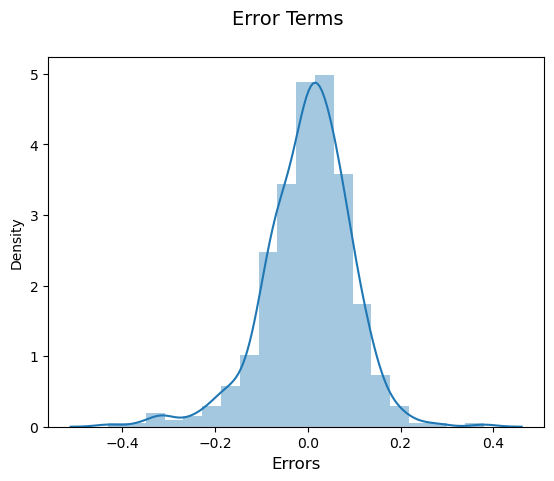

In [157]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_bike_train_cnt - y_bike_train_cnt_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 14)                  # Plot heading 
plt.xlabel('Errors', fontsize = 12)  

Analysis:
- We can observe tha there is an evenly distribution of errors which is a good sign that the assumption are valid.

Text(0, 0.5, 'Predicted Count')

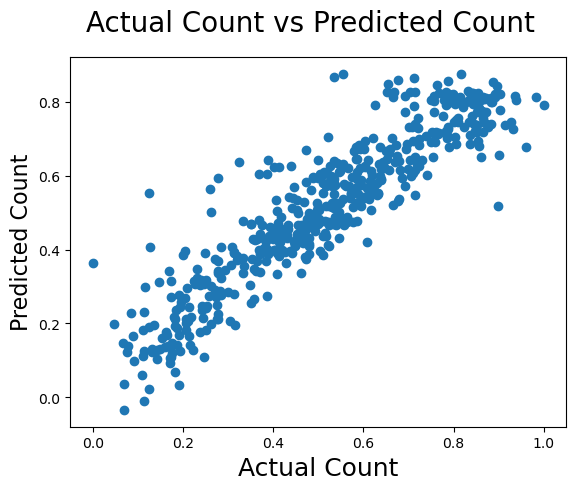

In [158]:
# Plotting y_train and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_bike_train_cnt,y_bike_train_cnt_pred)
fig.suptitle('Actual Count vs Predicted Count', fontsize=20)              # Plot heading 
plt.xlabel('Actual Count', fontsize=18)                          # X-label
plt.ylabel('Predicted Count', fontsize=16)   

# Making Prediction

## Applying the scaling on the test sets

In [159]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
# Scaling the Train Set
bike_test_set[num_vars] = scaler.transform(bike_test_set[num_vars])
bike_test_set.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,False,False,...,False,False,True,False,False,False,False,False,True,False
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,False,True,...,False,False,False,False,True,False,False,False,False,False
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,False,False,...,False,False,False,False,False,True,False,False,True,False
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,False,False,...,False,False,False,False,True,False,False,False,False,False
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,False,True,...,False,False,False,False,False,True,False,False,False,False


## Dividing Test Set into X and Y

In [160]:
# Dividing testing set into X and Y sets for the model building
y_bike_test_cnt = bike_test_set.pop('cnt')
X_bike_test_set = bike_test_set

## Predict with the Trained Model "lrm"

In [161]:
# Now let's use our model to make predictions.
X_bike_train_lrm.drop(['const'],axis=1,inplace=True)
# Creating X_test_new dataframe by dropping variables from X_test
X_bike_test_tm=X_bike_test_set[X_bike_train_lrm.columns]
# Adding a constant variable 
X_bike_test_tm=sm.add_constant(X_bike_test_tm)

In [162]:
y_bike_test_cnt_pred = lrm.predict(X_bike_test_tm)

## Model Evaluation

Text(0, 0.5, 'Predicted Count')

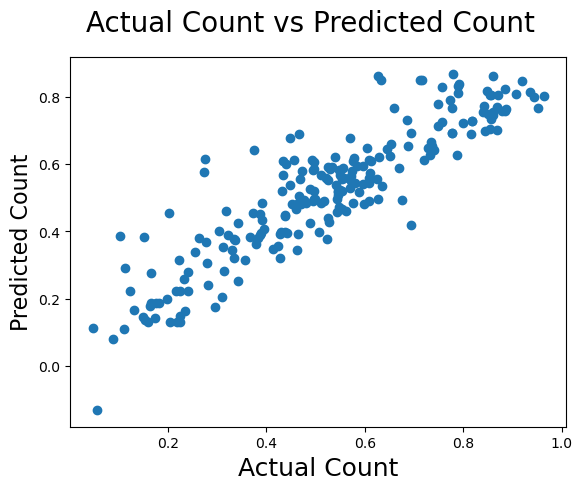

In [163]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_bike_test_cnt,y_bike_test_cnt_pred)
fig.suptitle('Actual Count vs Predicted Count', fontsize=20)              # Plot heading 
plt.xlabel('Actual Count', fontsize=18)                          # X-label
plt.ylabel('Predicted Count', fontsize=16)     

## R^2 Value Of Test Set

In [164]:
print(f'{"R^2 Score for Training Set : "}{round(lrm.rsquared * 100,1)}{"%"}')
print(f'{"Adjusted R^2 Score for Training Set: "}{round(lrm.rsquared_adj * 100,1)}{"%"}')

r2 = r2_score(y_bike_test_cnt, y_bike_test_cnt_pred)
print(f'Shape of Test Set: {X_bike_test_tm.shape}')
print(f'R^2 Score for the Test Set: {round(r2*100,2)}{"%"}')

# Number of rows
n = X_bike_test_tm.shape[0]

# Number of Predictors
p = X_bike_test_tm.shape[1]

# Adjusted R-squared
r2_adj = 1-(1-r2)*(n-1)/(n-p-1)
print(f'Adjusted R^2 Score for the Test Set: {round(r2_adj*100,2)}{"%"}')

R^2 Score for Training Set : 82.7%
Adjusted R^2 Score for Training Set: 82.4%
Shape of Test Set: (219, 10)
R^2 Score for the Test Set: 80.41%
Adjusted R^2 Score for the Test Set: 79.47%


# Final Report

As per Final Model below are the top 3 predictors which influence the bike bookings:
- **Year (yr):** The coefficient for the "yr" variable is 0.2354 with a very low p-value (p < 0.001), indicating a highly significant positive effect on bike demand. This suggests that there has been a significant increase in bike rentals over time.
- **Temperature (temp):** The coefficient for the "temp" variable is 0.4078 with a very low p-value (p < 0.001), indicating a highly significant positive effect on bike demand. This suggests that higher temperatures lead to increased bike rentals, which is intuitive as people are more likely to ride bikes in warmer weather.
- **Weather Situation (weathersit):** Both "weathersit_2" (partly cloudy) and "weathersit_3" (rain/snow/fog) variables have significant coefficients with very low p-values (p < 0.001). However, their coefficients have negative values, indicating a negative effect on bike demand. This suggests that adverse weather conditions (partly cloudy, rain, snow, fog) lead to decreased bike rentals, which is reasonable as people may be less inclined to ride bikes in such weather conditions.

Then the next considerable predictors would be as follows:

- **Season (season):** Spring season has co-efficient of **-0.1162** which indicates that a unit increase in this variable, **decreases** the bike rental by 0.1162 units. Also Winter season has co-effficient of **0.0480**, which indicates that a unit increase in this variable, **increases** the bike rental by **0.0480** units.
- **wiindspeed:** This variable state that a unit increase in this will decrease the bike rental by **0.1356** units.
